
# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions

Let's go through these steps!

In [195]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [196]:
df=pd.read_csv('Indigo Air Passengers.csv')

In [197]:
df.head()

,Date,No. of Passengers
0,01-04-2015,2619229
1,01-05-2015,2916342
2,01-06-2015,2675536
3,01-07-2015,2553602
4,01-08-2015,2519586


In [198]:
df.tail()

,Date,No. of Passengers
91,01-11-2022,7250201
92,01-12-2022,7810639
93,01-01-2023,7664272
94,01-02-2023,7504642
95,01-03-2023,8151131


In [199]:
## Cleaning up the data
df.columns=["Month","Passengers"]
df.head()

,Month,Passengers
0,01-04-2015,2619229
1,01-05-2015,2916342
2,01-06-2015,2675536
3,01-07-2015,2553602
4,01-08-2015,2519586


In [200]:
df['Passengers'] = df['Passengers'].astype(int)

In [201]:
## Drop last 2 rows
##df.drop(106,axis=0,inplace=True)

In [202]:
df.tail()

,Month,Passengers
91,01-11-2022,7250201
92,01-12-2022,7810639
93,01-01-2023,7664272
94,01-02-2023,7504642
95,01-03-2023,8151131


In [203]:
df.tail()

,Month,Passengers
91,01-11-2022,7250201
92,01-12-2022,7810639
93,01-01-2023,7664272
94,01-02-2023,7504642
95,01-03-2023,8151131


In [204]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [205]:
df

,Month,Passengers
0,2015-01-04,2619229
1,2015-01-05,2916342
2,2015-01-06,2675536
3,2015-01-07,2553602
4,2015-01-08,2519586
...,...,...
91,2022-01-11,7250201
92,2022-01-12,7810639
93,2023-01-01,7664272
94,2023-01-02,7504642


In [206]:
df.set_index('Month',inplace=True)

In [207]:
df.head()

,Passengers
Month,
2015-01-04,2619229
2015-01-05,2916342
2015-01-06,2675536
2015-01-07,2553602
2015-01-08,2519586


In [208]:
df.tail()

,Passengers
Month,
2022-01-11,7250201
2022-01-12,7810639
2023-01-01,7664272
2023-01-02,7504642
2023-01-03,8151131


In [209]:
df.describe()

,Passengers
count,9.600000e+01
mean,4.506118e+06
std,1.759802e+06
min,0.000000e+00
25%,3.415012e+06
50%,4.266972e+06
75%,5.975491e+06
max,8.151131e+06


## Step 2: Visualize the Data

<AxesSubplot:xlabel='Month'>

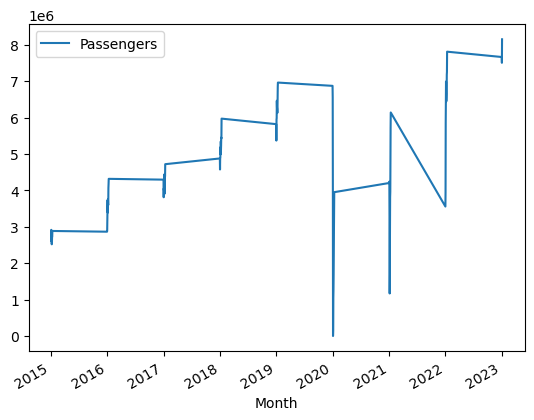

In [210]:
df.plot()

In [211]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [212]:
test_result=adfuller(df['Passengers'])

In [213]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis.Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [214]:
adfuller_test(df['Passengers'])

ADF Test Statistic : -1.8817324429687337
p-value : 0.34070293706076393
#Lags Used : 2
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [215]:
df['Passengers']

Month
2015-01-04    2619229
2015-01-05    2916342
2015-01-06    2675536
2015-01-07    2553602
2015-01-08    2519586
               ...   
2022-01-11    7250201
2022-01-12    7810639
2023-01-01    7664272
2023-01-02    7504642
2023-01-03    8151131
Name: Passengers, Length: 96, dtype: int32

## Differencing

In [216]:
df['Sales First Difference'] = df['Passengers'] - df['Passengers'].shift(1)

In [217]:
df['Passengers'].shift(1)

Month
2015-01-04          NaN
2015-01-05    2619229.0
2015-01-06    2916342.0
2015-01-07    2675536.0
2015-01-08    2553602.0
                ...    
2022-01-11    7178149.0
2022-01-12    7250201.0
2023-01-01    7810639.0
2023-01-02    7664272.0
2023-01-03    7504642.0
Name: Passengers, Length: 96, dtype: float64

In [218]:
df['Seasonal First Difference']=df['Passengers']-df['Passengers'].shift(2)

In [219]:
df.head(14)

,Passengers,Sales First Difference,Seasonal First Difference
Month,,,
2015-01-04,2619229,NaN,NaN
2015-01-05,2916342,297113.0,NaN
2015-01-06,2675536,-240806.0,56307.0
2015-01-07,2553602,-121934.0,-362740.0
2015-01-08,2519586,-34016.0,-155950.0
2015-01-09,2557021,37435.0,3419.0
2015-01-10,2718376,161355.0,198790.0
2015-01-11,2728183,9807.0,171162.0
2015-01-12,2885345,157162.0,166969.0


In [220]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -2.579599735369588
p-value : 0.09728731339475016
#Lags Used : 10
Number of Observations Used : 83
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


<AxesSubplot:xlabel='Month'>

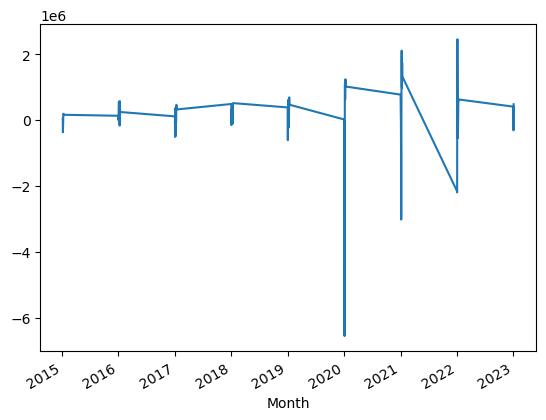

In [221]:
df['Seasonal First Difference'].plot()

## Auto Regressive Model
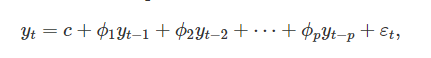

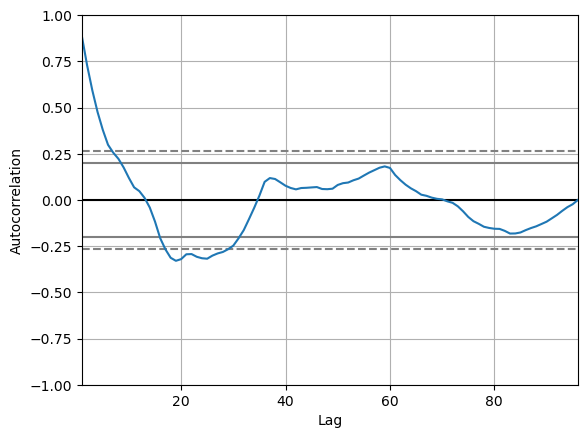

In [222]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Passengers'])
plt.show()

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
   

# p,d,q
    p = AR model lags
    d = differencing (How many Seasonal differencing I did?)
    q = MA lags

In [223]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

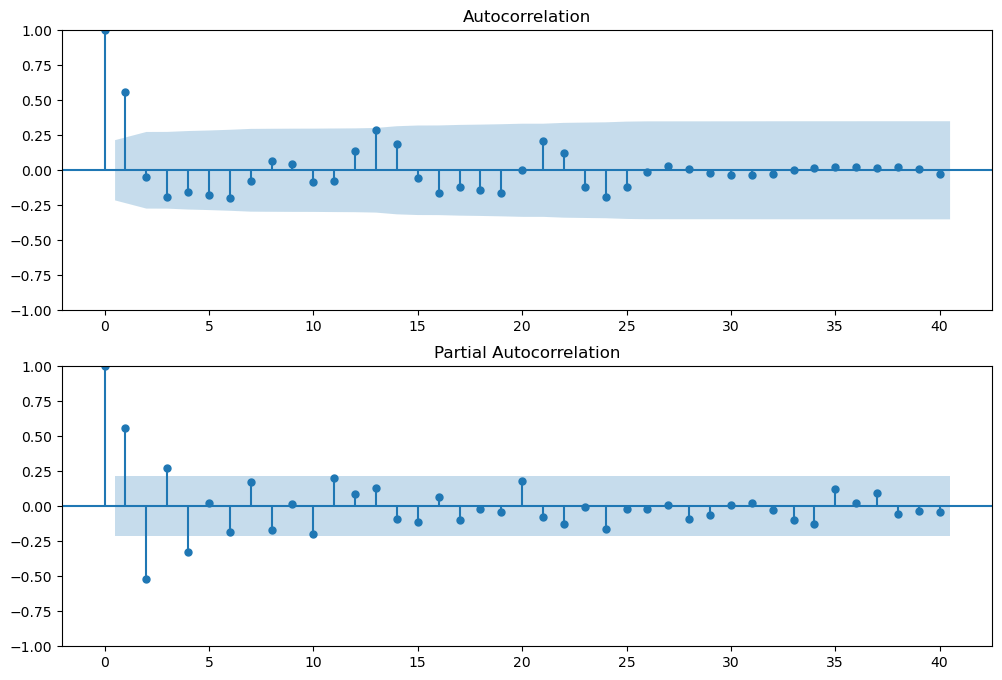

In [224]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [225]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [226]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA

In [227]:
model=ARIMA(df['Passengers'],order=(1,1,1))
model_fit=model.fit()

C:\Users\Abhis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Abhis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Abhis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [228]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   96
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1409.989
Date:                Thu, 31 Aug 2023   AIC                           2825.979
Time:                        23:59:15   BIC                           2833.640
Sample:                             0   HQIC                          2829.075
                                 - 96                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1897      0.218     -0.870      0.384      -0.617       0.238
ma.L1          0.5848      0.216      2.703      0.007       0.161       1.009
sigma2      4.811e+11   4.63e-13   1.04e+24      0.000    4.81e+11    4.81e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               307.36
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               6.64   Skew:                            -2.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.88e+39. Standard errors may be unstable.
"""

C:\Users\Abhis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Abhis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<AxesSubplot:xlabel='Month'>

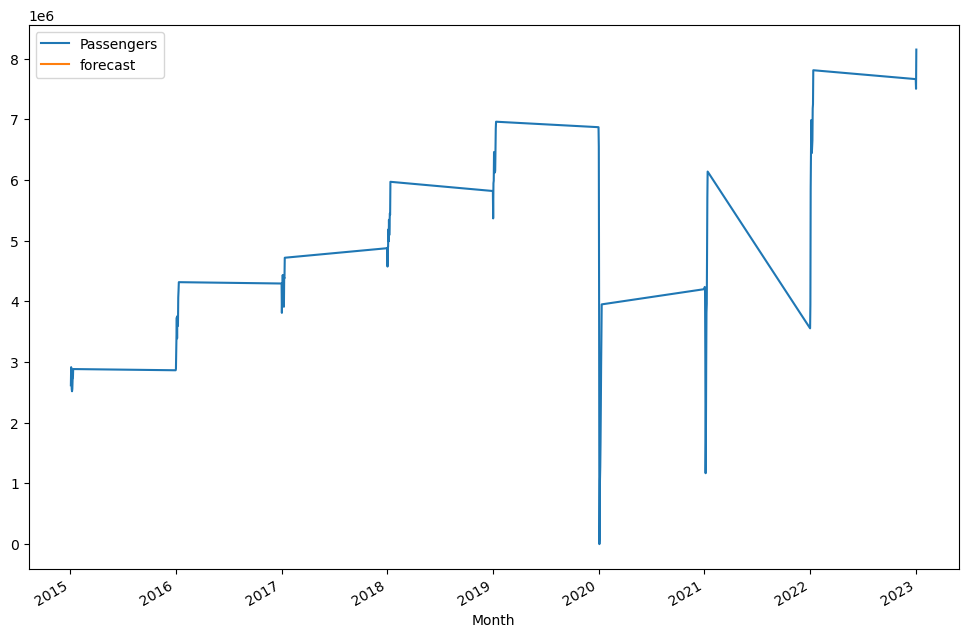

In [229]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Passengers','forecast']].plot(figsize=(12,8))

In [230]:
import statsmodels.api as sm

In [231]:
model=sm.tsa.statespace.SARIMAX(df['Passengers'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\Abhis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Abhis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Month'>

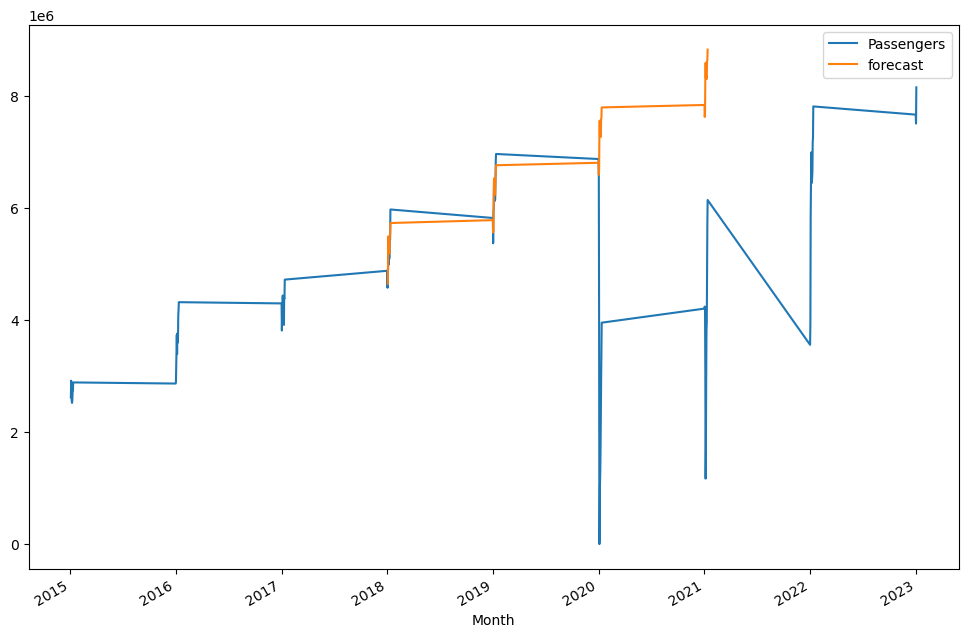

In [232]:
df['forecast']=results.predict(start=35,end=80,dynamic=True)
df[['Passengers','forecast']].plot(figsize=(12,8))

In [233]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,23)]

In [234]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [235]:
future_datest_df.tail()

,Passengers,Sales First Difference,Seasonal First Difference,forecast
2024-07-03,NaN,NaN,NaN,NaN
2024-08-03,NaN,NaN,NaN,NaN
2024-09-03,NaN,NaN,NaN,NaN
2024-10-03,NaN,NaN,NaN,NaN
2024-11-03,NaN,NaN,NaN,NaN


In [236]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

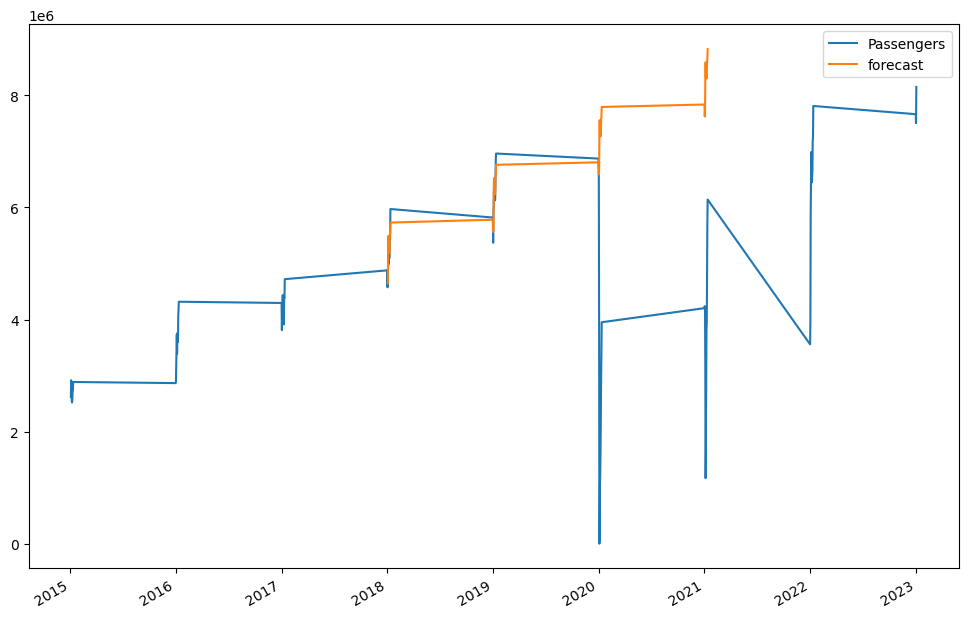

In [237]:
future_df['forecast'] = results.predict(start = 35, end = 80, dynamic= True)  
future_df[['Passengers', 'forecast']].plot(figsize=(12, 8)) 